# Heart Failure Prediction - Datenanalyse
### Florian Hartl (WI-B-6)

Die Zielsetzung des Heart Failure Prediction Datensatzes besteht darin, die Vorhersage von Herzinsuffizienz basierend auf klinischen Daten zu ermöglichen. Der Datensatz enthält verschiedene Merkmale und Informationen über Patienten, die an Herzinsuffizienz leiden, wie beispielsweise Alter, Geschlecht, Blutdruckwerte, Serumkreatinin und andere medizinische Parameter. 

## 1. Bibliotheken laden und Daten vorbereiten

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('heart_failure_data.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
# Plot erstellen
plt.plot(df[time], df[DEATH_EVENT])
plt.xlabel('Zeit')
plt.ylabel('Todesereignis')
plt.title('Zusammenhang zwischen Zeit und Todesereignis')
plt.xticks(time)
plt.yticks([0, 1], ['Nein', 'Ja'])

NameError: name 'time' is not defined

Erklärung der Variablen:

1. **age**: Das Alter des Patienten in Jahren.
2. **anaemia**: Ein binärer Wert (0 oder 1), der angibt, ob der Patient eine Anämie hat (0 = Nein, 1 = Ja).
3. **creatinine_phosphokinase**: Das Niveau des Enzyms Kreatinphosphokinase im Blut in mcg/L.
4. **diabetes**: Ein binärer Wert (0 oder 1), der angibt, ob der Patient an Diabetes leidet (0 = Nein, 1 = Ja).
5. **ejection_fraction**: Die Auswurfleistung des Herzens in Prozent.
6. **high_blood_pressure**: Ein binärer Wert (0 oder 1), der angibt, ob der Patient an Bluthochdruck leidet (0 = Nein, 1 = Ja).
7. **platelets**: Die Anzahl der Blutplättchen im Blut in kiloplates/mL.
8. **serum_creatinine**: Das Niveau des kreatininhaltigen Stoffwechselprodukts im Blut in mg/dL.
9. **serum_sodium**: Der Natriumgehalt im Blut in mEq/L.
10. **sex**: Das Geschlecht des Patienten (0 = weiblich, 1 = männlich).
11. **smoking**: Ein binärer Wert (0 oder 1), der angibt, ob der Patient raucht (0 = Nein, 1 = Ja).
12. **time**: Die Nachbeobachtungszeit in Tagen.
13. **DEATH_EVENT**: Ein binärer Wert (0 oder 1), der angibt, ob der Patient während der Nachbeobachtungszeit gestorben ist (0 = Nein, 1 = Ja).


### 2. Allgemeine Infos zum Datensatz

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:xlabel='time', ylabel='age'>

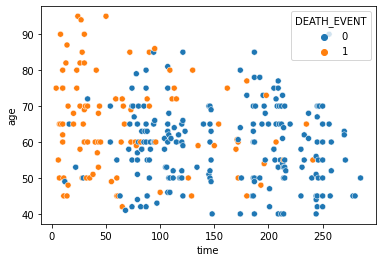

In [12]:
sns.scatterplot(data=df, x='time', y='age', hue='DEATH_EVENT')

Hier lässt sich bereits erkennen, dass die Variablen 'age', 'ejection_fraction' und 'serum_sodium' normalverteilt sind, da der Mittelwert mit dem Median übereinstimmt.Später werden die Daten noch visualisiert, dann sollten wir eine Glockenkurve sehen.

### 3. Data Cleaning

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In dem Datensatz sind keine Werte mit Null Values oder Duplikaten vorhanden, daher muss in diesem Schritt nicht weiter verfahren werden. Wären allerdings Null Values vorhanden, so müssten wir die entsprechenden Spalten entweder entfernen (wenn dadurch nicht zu viele Informationen verloren gehen) oder die Werte durch Mittelwert/Median ersetzen oder mit Hilfe eines Machine-Learning Algorithmus berechnen.

### 1.3 Daten visualisieren

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

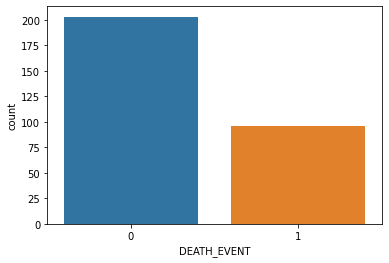

In [9]:
sns.countplot(data=df, x='DEATH_EVENT')

#### Wir stehen vor der Herausforderung, mit einem unausgeglichenen Datensatz umzugehen, bei dem das Verhältnis der Variable "DEATH_EVENT" nicht ausgeglichen ist.

#### Im nächsten Schritt teile ich die numerischen Variablen und die kategorischen Variablen auf.

In [10]:
numeric_features = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']]
categorical_feature= df[['anaemia', 'smoking', 'diabetes', 'high_blood_pressure', 'sex', 'DEATH_EVENT']]

## 3.1 Analyse der numerischen Variablen

In [11]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
time,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0
DEATH_EVENT,299.0,0.321070,0.467670,0.0,0.0,0.0,1.0,1.0


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068,0.253729
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346,0.062728
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729,-0.268603
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514,-0.049139
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315,0.294278
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640,-0.195204
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000,-0.526964
DEATH_EVENT,0.253729,0.062728,-0.268603,-0.049139,0.294278,-0.195204,-0.526964,1.000000


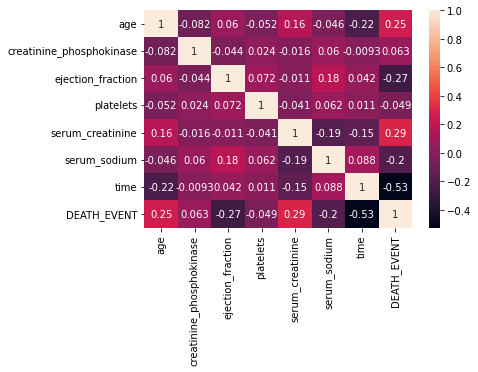

In [12]:
numeric_features_corr = numeric_features.corr()
sns.heatmap(numeric_features_corr, annot=True)
numeric_features_corr

In [13]:
numeric_features_corr

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068,0.253729
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346,0.062728
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729,-0.268603
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514,-0.049139
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315,0.294278
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640,-0.195204
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000,-0.526964
DEATH_EVENT,0.253729,0.062728,-0.268603,-0.049139,0.294278,-0.195204,-0.526964,1.000000


* **Age**: positiv korreliert mit DEATH_EVENT --> je älter ein Patient, desto wahrscheinlicher ist es, dass er stirbt
* **Ceatinine**: keine Korrelation
* **Ejection Fraction**: Negative Korrelation --> je höher der Wert von Ejection Fraction ist, desto niedriger ist die Wahrscheinlichkeit für Herzversagen
* **Platelets**: keine Korrelation
* **Serum Creatinine**: positive Korrelation
* **Serum Sodium**: negativ --> je höher, desto niedriger ist die Wahrscheinlichkeit zu sterben
* **Time** --> womöglich wichtigste Variable --> je niedriger, desto niedriger ist W'keit an Herzversagen zu sterben

Es lassen sich also folgende Schlossfolgerungen im Bezug zu biologische Zusammenhängen der Herzfrequenz erkennen:

* Die Herfrequenz lässt im allgemeinen im **Alter** nach
* Die **Ejektionsfraktion** (also der Prozentsatz des Blutes in einer Herzkammer, der pro Schlag ausgestoßen wird) ist bei Personen, die anfällig für Herzversagen sind niedriger. Das heißt je höher der Wert ist, desto besser ist die Herzfunktion (https://www.heartfailurematters.org/de/herzinsuffizienz-verstehen/was-ist-die-ejektionsfraktion-hfref-und-hfpef/#:~:text=Die%20Ejektionsfraktion%20(EF)%20ist%20der,einfach%20und%20zuverl%C3%A4ssig%20gemessen%20werden; https://link.springer.com/article/10.1007/s00059-022-05156-0)
* Ein erhöhter **Serumkreatininspiegel** kann auf eine reduzierte Nierenfunktion hinweisen, die wiederum auf eine Herzinsuffizienz oder andere kardiovaskuläre Erkrankungen zurückzuführen sein kann. Daher wird der Serumkreatininspiegel häufig als ein wichtiger Marker für die Bewertung der Nieren- und Herzgesundheit verwendet (https://www.netdoktor.de/laborwerte/kreatinin/)
* Ein hoher **Serum-Natriumspiegel**, auch als Hypernatriämie bezeichnet, kann zu Dehydratation und einer Verringerung des Blutvolumens führen. Dadurch kann das Herz schwerer arbeiten und die Durchblutung beeinträchtigt werden (https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5?ref=https://githubhelp.com)
* je niedriger, die 'time' (also die Nachbeobachtungszeit) ist, desto niedriger ist die W'keit für Herzversagen


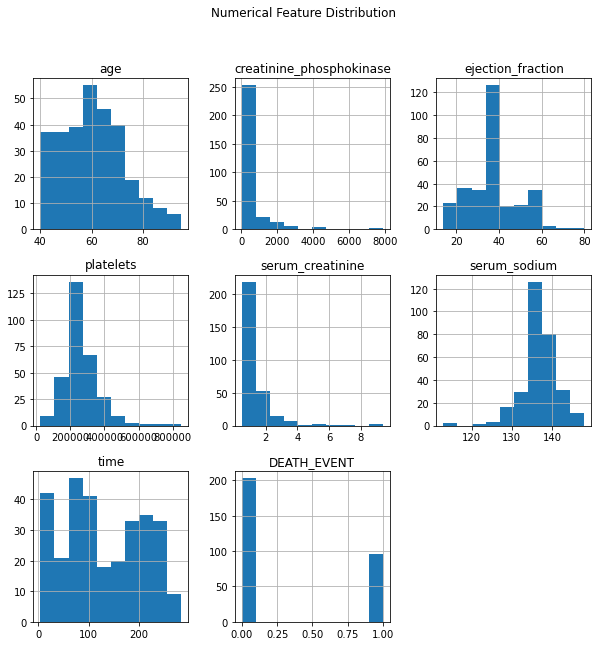

In [14]:
numeric_features.hist(figsize=[10, 10])
plt.suptitle("Numerical Feature Distribution")
plt.show()

### Age

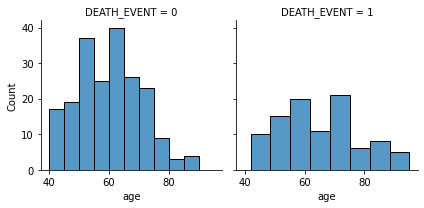

In [15]:
# Erstellen des FacetGrid-Objekts basierend auf der Spalte "day"
g = sns.FacetGrid(df, col="DEATH_EVENT")

# Festlegen der Visualisierung für jede Achse
g.map(sns.histplot, "age")

# Anzeigen des FacetGrid
plt.show()

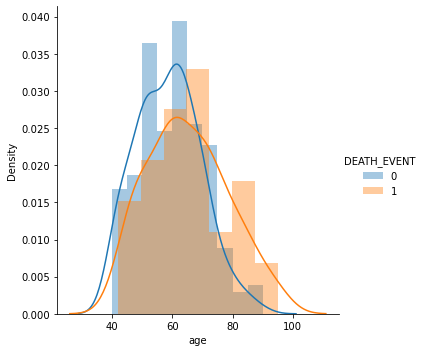

In [16]:
# Anzeigen der Dichtefunktion
sns.FacetGrid(df, hue="DEATH_EVENT",height = 5).map(sns.distplot,"age"). add_legend()
plt.show()

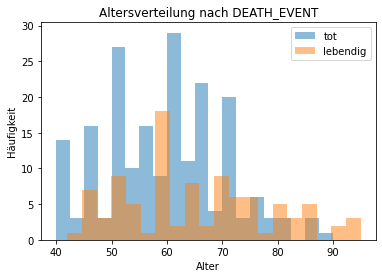

In [17]:
plt.hist(df[df['DEATH_EVENT'] == 0]['age'], bins=20, alpha=0.5, label='tot')
plt.hist(df[df['DEATH_EVENT'] == 1]['age'], bins=20, alpha=0.5, label='lebendig')
plt.xlabel('Alter')
plt.ylabel('Häufigkeit')
plt.title('Altersverteilung nach DEATH_EVENT')
plt.legend()
plt.show()

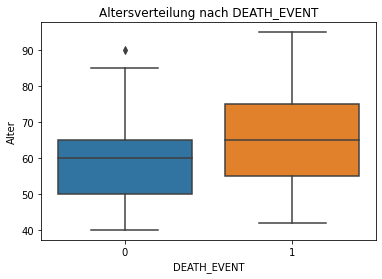

In [18]:
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.xlabel('DEATH_EVENT')
plt.ylabel('Alter')
plt.title('Altersverteilung nach DEATH_EVENT')
plt.show()

Mit Hilfe der Grafiken lässt sich erkennen, dass  mit erhöhtem Alter der Testpersonen die W'keit für Herzversagen steigt

### Ejection Fraction 

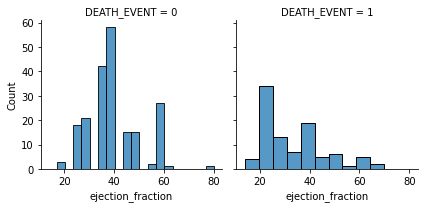

In [19]:
# Erstellen des FacetGrid-Objekts basierend auf der Spalte "day"
g = sns.FacetGrid(df, col="DEATH_EVENT")

# Festlegen der Visualisierung für jede Achse
g.map(sns.histplot, "ejection_fraction")

# Anzeigen des FacetGrid
plt.show()

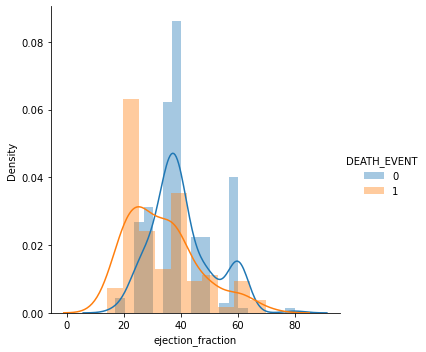

In [20]:
# Anzeigen der Dichtefunktion
sns.FacetGrid(df, hue="DEATH_EVENT",height = 5).map(sns.distplot,"ejection_fraction"). add_legend()
plt.show()

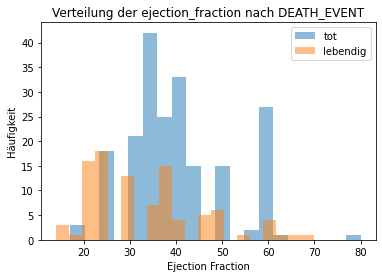

In [21]:
plt.hist(df[df['DEATH_EVENT'] == 0]['ejection_fraction'], bins=20, alpha=0.5, label='tot')
plt.hist(df[df['DEATH_EVENT'] == 1]['ejection_fraction'], bins=20, alpha=0.5, label='lebendig')
plt.xlabel('Ejection Fraction')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der ejection_fraction nach DEATH_EVENT')
plt.legend()
plt.show()

### Serum Sodium

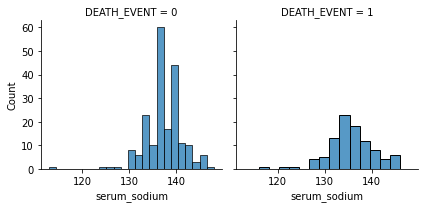

In [22]:
# Erstellen des FacetGrid-Objekts basierend auf der Spalte "day"
g = sns.FacetGrid(df, col="DEATH_EVENT")

# Festlegen der Visualisierung für jede Achse
g.map(sns.histplot, "serum_sodium")

# Anzeigen des FacetGrid
plt.show()

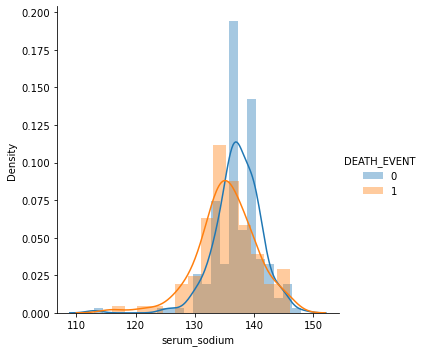

In [23]:
# Anzeigen der Dichtefunktion
sns.FacetGrid(df, hue="DEATH_EVENT",height = 5).map(sns.distplot,"serum_sodium"). add_legend()
plt.show()

## Time

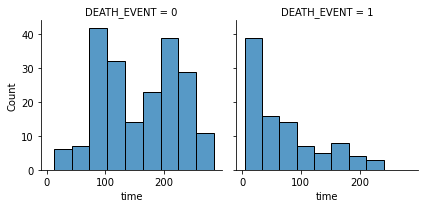

In [24]:
# Erstellen des FacetGrid-Objekts basierend auf der Spalte "day"
g = sns.FacetGrid(df, col="DEATH_EVENT")

# Festlegen der Visualisierung für jede Achse
g.map(sns.histplot, "time")

# Anzeigen des FacetGrid
plt.show()

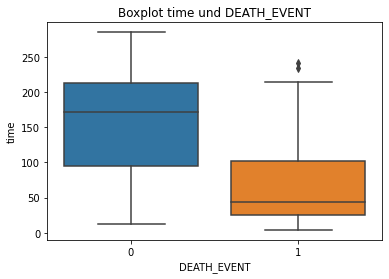

In [25]:
sns.boxplot(x='DEATH_EVENT', y='time', data=df)
plt.xlabel('DEATH_EVENT')
plt.ylabel('time')
plt.title('Boxplot time und DEATH_EVENT')
plt.show()

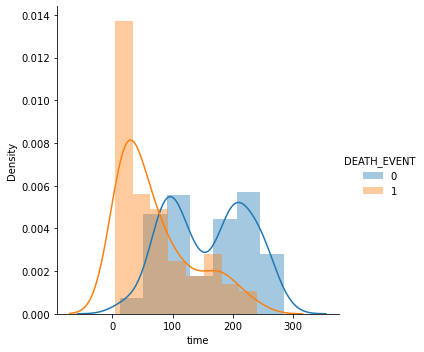

In [26]:
# Anzeigen der Dichtefunktion
sns.FacetGrid(df, hue="DEATH_EVENT",height = 5).map(sns.distplot,"time"). add_legend()
plt.show()

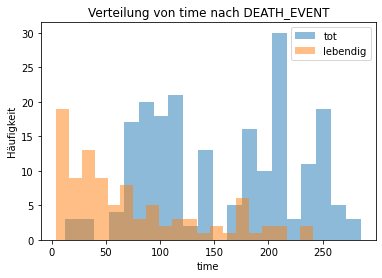

In [27]:
plt.hist(df[df['DEATH_EVENT'] == 0]['time'], bins=20, alpha=0.5, label='tot')
plt.hist(df[df['DEATH_EVENT'] == 1]['time'], bins=20, alpha=0.5, label='lebendig')
plt.xlabel('time')
plt.ylabel('Häufigkeit')
plt.title('Verteilung von time nach DEATH_EVENT')
plt.legend()
plt.show()

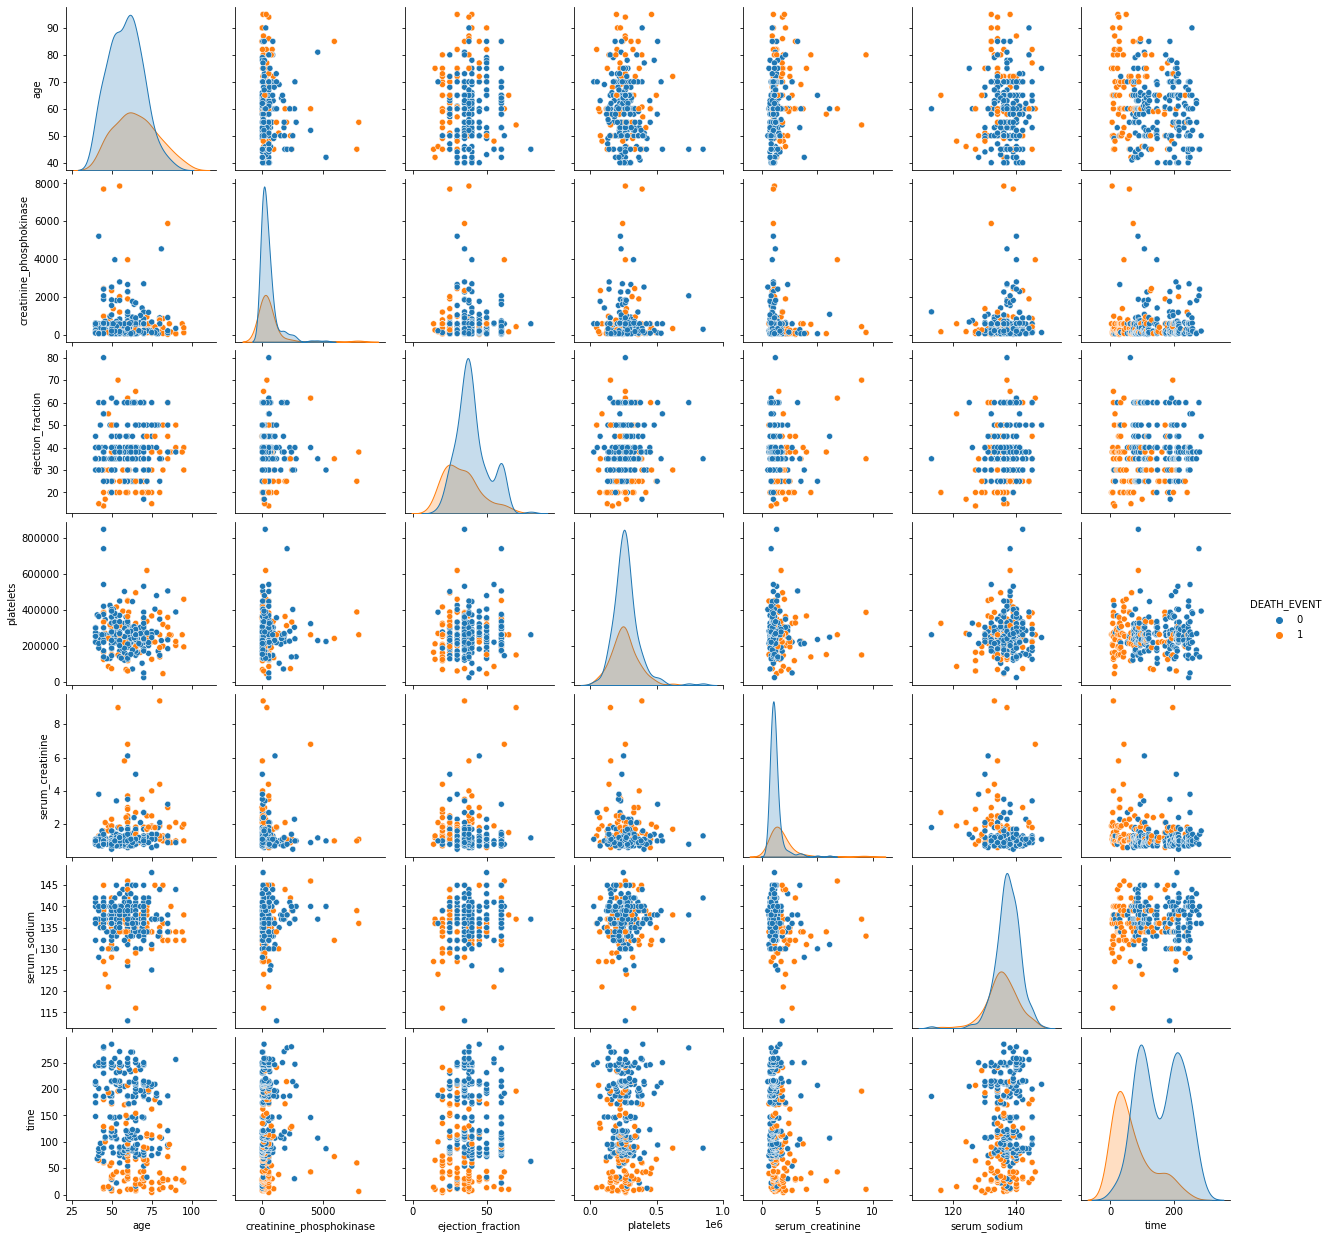

In [28]:
sns.pairplot(data=numeric_features, hue='DEATH_EVENT')

Es lässt sich anhand der Datenvisualisierung erkennen, dass die vorher getroffenen Annahmen stimmen. Daher werden die Variablen 'age', 'time', 'serum_sodium' und 'serum_creatinine' ins Modell aufgenommen. Um die Vermutungen aber noch weiter auszuführen, schauen wir uns noch ein paar mehr Zusammenhänge an. Hierzu gebe ich nochmal die Korrelationsmatrix aus

<AxesSubplot:>

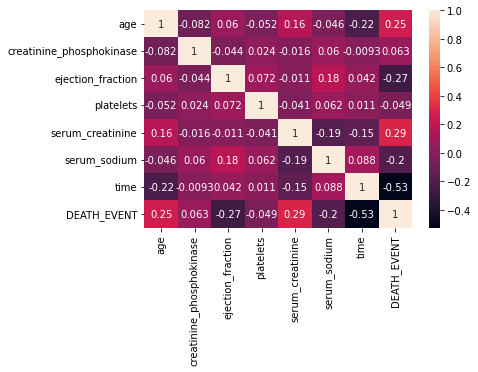

In [29]:
numeric_features_corr = numeric_features.corr()
sns.heatmap(numeric_features_corr, annot=True)

### Alter vs. Serum_Creatinine
Es lässt sich eine Korrelation Alter und Serum Creatinine erkennen. Das schauen wir uns genauer an

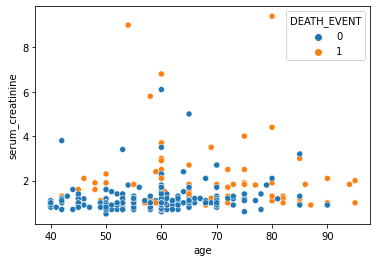

<Figure size 720x720 with 0 Axes>

In [30]:
sns.scatterplot(data=numeric_features, x='age', y='serum_creatinine', hue='DEATH_EVENT')
plt.figure(figsize=(10,10))
plt.show()

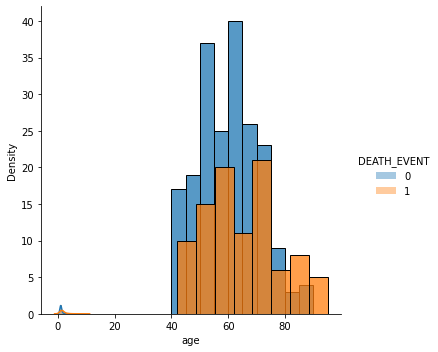

In [31]:
# Anzeigen der Dichtefunktion
g = sns.FacetGrid(df, hue="DEATH_EVENT",height = 5).map(sns.distplot,"serum_creatinine"). add_legend()
g.map(sns.histplot, "age")
plt.show()

Serum-Kreatinin steigt also mit dem Alter tendenziell

## 3.2 Kategorische Variablen

In [32]:
categorical_feature.head()

,anaemia,smoking,diabetes,high_blood_pressure,sex,DEATH_EVENT
0,0,0,0,1,1,1
1,0,0,0,0,1,1
2,0,1,0,0,1,1
3,1,0,0,0,1,1
4,1,0,1,0,0,1


<AxesSubplot:>

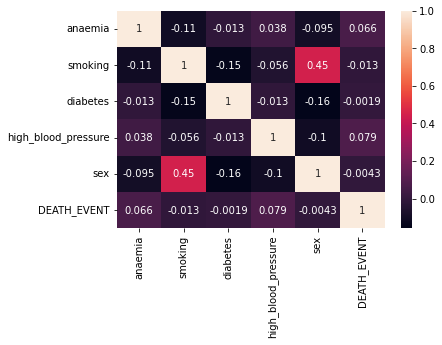

In [33]:
sns.heatmap(categorical_feature.corr(), annot=True)

Keine der Variablen korreliert enstprechend mit DEATH_EVENT. Daher plotte ich noch die HeatMap des kompletten Datensatzes

<AxesSubplot:>

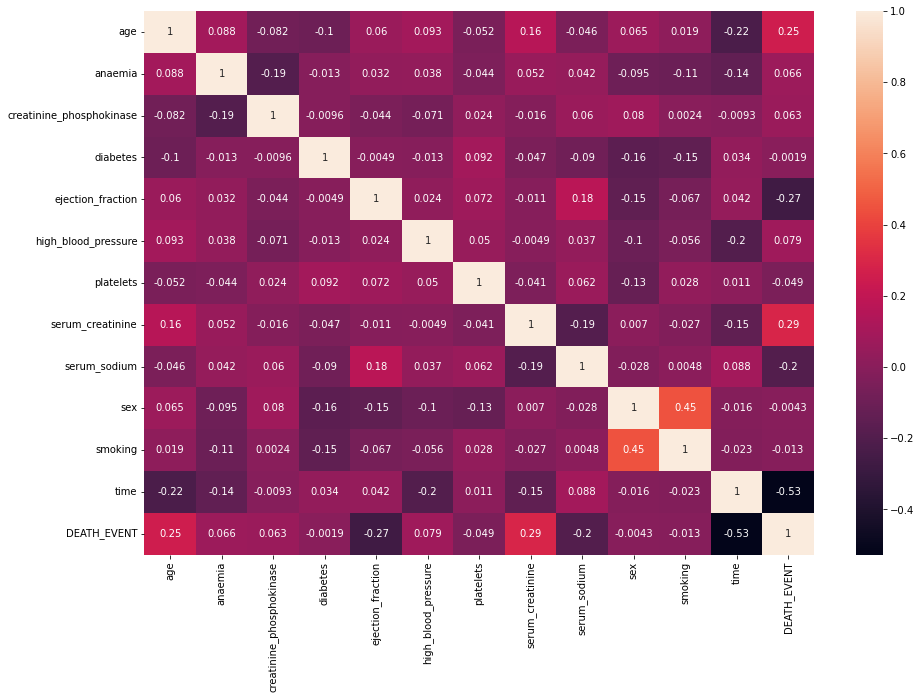

In [34]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True )

* Smoking korreliert mit Sex. Es rauchen also mehr Frauen als Männer :) interessant^^
* Es wäre noch interessant den Zusammenhang zwischen Geschlecht und Herzversagen zu visualisieren, auch wenn keine richtige Korrelation vorherrscht. Hierzu plotten wir die Daten in einem Kuchendiagramm

<AxesSubplot:xlabel='sex', ylabel='count'>

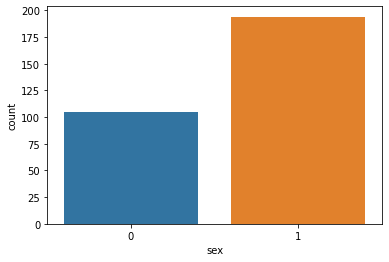

In [35]:
sns.countplot(data=df, x='sex')

Im Datensatz sind fast doppelt so viele Frauen wie Männer vorhanden

In [36]:
women_survived = len(df[(df["DEATH_EVENT"]==0) & (df["sex"]==0)]) / len(df) * 100
women_dead     = len(df[(df["DEATH_EVENT"]==1) & (df["sex"]==0)]) / len(df) * 100
men_survived   = len(df[(df["DEATH_EVENT"]==0) & (df["sex"]==1)]) / len(df) * 100
men_dead     = len(df[(df["DEATH_EVENT"]==1) & (df["sex"]==1)]) / len(df) * 100


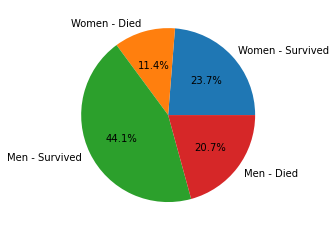

In [37]:

# Daten für das Kuchendiagramm
labels = ['Women - Survived', 'Women - Died', 'Men - Survived', 'Men - Died']
sizes = [women_survived, women_dead, men_survived, men_dead]  # Größen in Prozent

# Kuchendiagramm erstellen
plt.pie(sizes, labels=labels, autopct='%1.1f%%')


# Diagramm anzeigen
plt.show()

Obwohl mehr Frauen als Männer im Datensatz vorhanden sind, was auf eine höhere Sterblichkeitsrate bei den Frauen hindeutet, da schlichtweg mehr vorhanden sind, sterben mehr Männer an Herzversagen als Frauen.

Bei den kategorischen Variable lässt sich aber im allgemeinen feststellen, dass nur relativ schwache Korrelationen vorhanden sind. Vielleicht nehme ich die Variable 'sex' noch in das Modell auf, das prüfe ich aber erst im nächsten Schritt.

### 4. Machine Learning Modell
Ich beschränke mich hier auf die folgenden Algorithmen zur Klassifizierung: 
- Logistische Regression: Ein Algorithmus, der eine logistische Funktion verwendet, um die Wahrscheinlichkeit der Zugehörigkeit zu einer bestimmten Klasse vorherzusagen.

- K-Nearest Neighbors (KNN): Ein Algorithmus, der die Klassenzugehörigkeit eines Beispiels basierend auf den Klassen der k nächsten Nachbarn im Merkmalsraum vorhersagt.

Das Modell könnte im Nachhinein noch mir GridSearch und Gradient Boosting getuned werden, um noch bessere Ergebnisse zu erzielen. Zuerst baue ich das Modell mit allen Variablen des Datensatzes, dann schließe ich mittels Backward Selection die irrelevanten aus.

In [38]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [39]:
# Aufteilung des Datensatzes in Trainings- und Testdaten
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialisierung und Training des KNN-Modells
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred = knn.predict(X_test)

# Auswertung der Genauigkeit
accuracy_knn = accuracy_score(y_test, y_pred)
print("Genauigkeit: ", accuracy_knn)

Genauigkeit:  0.7333333333333333


## Logistische Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialisierung und Training des logistischen Regressionsmodells
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred = lr.predict(X_test)

# Auswertung der Genauigkeit
accuracy_lr = accuracy_score(y_test, y_pred)
print("Genauigkeit: ", accuracy_lr)

Genauigkeit:  0.8666666666666667


Das beste Ergebnis haben wir mit der logistischen Regression erzielt. Vielleicht können wir das Modell noch tunen.

## 5. Modell-Tuning und Evaluierung

### 5.1 Backward Selection 
Ich nehme nun Variablen raus, die warhscheinlich nicht so ausschlaggebend für das Machine Learning Modell sind. (Bei vorherigen Tests hat sich ergeben, dass die Features time, age, ejection_fraction und serum_sodium zu den besten Ergebnissen führen

In [42]:
# Löschen von Variablen
features_restricted = ['age', 'time', 'ejection_fraction', 'serum_sodium']

In [43]:
X_restricted = df[features_restricted]
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X_restricted, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [44]:
X_restricted

,age,time,ejection_fraction,serum_sodium
0,75.0,4,20,130
1,55.0,6,38,136
2,65.0,7,20,129
3,50.0,7,20,137
4,65.0,8,20,116
...,...,...,...,...
294,62.0,270,38,143
295,55.0,271,38,139
296,45.0,278,60,138
297,45.0,280,38,140


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialisierung und Training des logistischen Regressionsmodells
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred = lr.predict(X_test)

# Auswertung der Genauigkeit
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit: ", accuracy)

Genauigkeit:  0.9


Die Genauigkeit steigt. Zur Evaluierung des Modells lassen wir uns noch die Confusion Matrix und die ROC Kurve angeben

In [46]:
import pandas as pd
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                  41                   2
Actual Positive                   4                  13


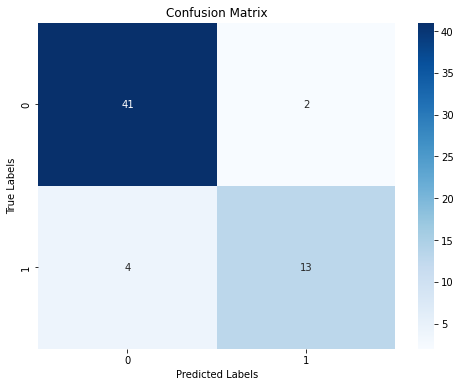

In [47]:
# Erstelle eine Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Passe die Achsenbeschriftung an
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Füge den Titel hinzu
plt.title('Confusion Matrix')

# Zeige die Heatmap an
plt.show()

Nun zeichne ich noch die ROC-Kurve

In [48]:
X = df[features_restricted].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X_restricted, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

lr.fit(X_train, y_train)

y_pred_logistic = lr.decision_function(X_test)

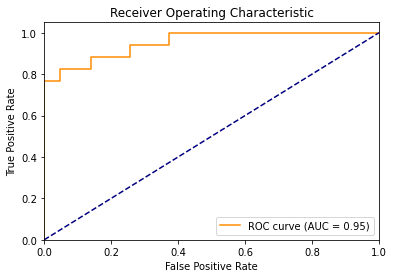

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Trainiere dein Modell mit X_train und y_train

# Erzeuge die Vorhersagen für die Testdaten
y_scores = lr.predict_proba(X_test)[:, 1]  # Vorhersage der Wahrscheinlichkeiten für die positive Klasse

# Berechnung der ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Berechnung der AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot der ROC-Kurve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Berechnung der Likelihood Ratio der beiden Modelle (habe ich in der Studienarbeit nicht mehr aufgenommen)
* Die Likelihood Ratio bei der logistischen Regression vergleicht die Passung zweier konkurrierender Modelle, indem sie die Verbesserung der Log-Likelihood-Werte bewertet. 
* Eine höhere Likelihood Ratio deutet darauf hin, dass das Modell eine bessere Anpassung an die Daten bietet und die Wahrscheinlichkeit des Ereignisses genauer vorhersagt.

In [50]:
import statsmodels.api as sm

# Vollständiges Modell
full_model = sm.Logit(y, X)  # y = Zielvariable, X = Features
full_result = full_model.fit()
full_log_likelihood = full_result.llf

# Eingeschränktes Modell
restricted_model = sm.Logit(y, X_restricted)  # X_restricted = eingeschränkte Features
restricted_result = restricted_model.fit()
restricted_log_likelihood = restricted_result.llf

# Berechnung der Likelihood Ratio
lr = -2 * (restricted_log_likelihood - full_log_likelihood)
print('Wert der Likelihood Ratio ', lr)

Optimization terminated successfully.
         Current function value: 0.410324
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.410324
         Iterations 6
Wert der Likelihood Ratio  -0.0


Die Likelihood Ratio liegt bei 30,19..., was darauf hindeutet, dass das Modell mit weniger Variablen deutlich besser ist :)